In [5]:
from environment import Environment
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [6]:
env = Environment()
q_table = np.random.uniform(low=-1, high=1, size=([10] + [10] + [4]))
print(q_table.shape)

lr = 0.1
gamma = 0.95
epsilon = 0.2

[[ 1.          0.         -0.31950791 -0.55184557 -0.74110113 -0.90365394
  -1.04767251 -1.17790642 -1.29739671 -1.40822469]
 [ 0.         -0.31950791 -0.55184557 -0.74110113 -0.90365394 -1.04767251
  -1.17790642 -1.29739671 -1.40822469 -1.51188643]
 [-0.31950791 -0.55184557 -0.74110113 -0.90365394 -1.04767251 -1.17790642
  -1.29739671 -1.40822469 -1.51188643 -1.60949864]
 [-0.55184557 -0.74110113 -0.90365394 -1.04767251 -1.17790642 -1.29739671
  -1.40822469 -1.51188643 -1.60949864 -1.70192008]
 [-0.74110113 -0.90365394 -1.04767251 -1.17790642 -1.29739671 -1.40822469
  -1.51188643 -1.60949864 -1.70192008 -1.78982744]
 [-0.90365394 -1.04767251 -1.17790642 -1.29739671 -1.40822469 -1.51188643
  -1.60949864 -1.70192008 -1.78982744 -1.87376476]
 [-1.04767251 -1.17790642 -1.29739671 -1.40822469 -1.51188643 -1.60949864
  -1.70192008 -1.78982744 -1.87376476 -1.95417694]
 [-1.17790642 -1.29739671 -1.40822469 -1.51188643 -1.60949864 -1.70192008
  -1.78982744 -1.87376476 -1.95417694 -2.03143313]


In [7]:
scores = []

for i in tqdm.tqdm(range(1, 1500)):
    state = env.reset()
    score = 0
    reward = 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        #print(action)
        if np.random.uniform(0,1) < epsilon:
            action = np.random.randint(0,4)

        next_state, reward, done = env.step(action)

        old_val = q_table[state + (action, )]
        new_val = (1-lr) * old_val + lr * (reward + gamma * np.max(q_table[next_state]))

        q_table[state + (action, )] = new_val
        state = next_state
        score += 1

    scores.append(score)

100%|██████████| 1499/1499 [00:00<00:00, 3010.04it/s]


10.24882791691646


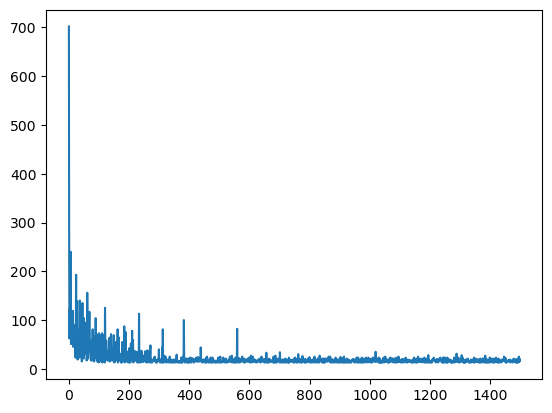

In [8]:
print(np.max(q_table))
plt.plot(scores)